In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
path = '/content/zomato.csv'
df_zomato = pd.read_csv(path, encoding='latin-1')
df_zomato

In [ ]:
df_zomato.head(10)

In [ ]:
df_zomato.info()

In [ ]:
df_zomato.describe()

# In Data Analysis What All Things We Do
1. Missing Values
2. Explore About the Numerical Variables
3. Explore About categorical Variables
4. Finding Relationship between features

In [ ]:
df_zomato.shape

(9551, 21)

In [ ]:
df_zomato.size

200571

In [ ]:
df_zomato.isna()

In [ ]:
df_zomato.isna().sum()

In [ ]:
df_zomato.isnull()

In [ ]:
df_zomato.isnull().sum()

In [ ]:
df_zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
for features in df_zomato.columns:
  if df_zomato[features].isnull().sum()>0:
    print(features)

Cuisines


In [ ]:
[features for features in df_zomato.columns if df_zomato[features].isnull().sum()>0]

['Cuisines']

<Axes: >

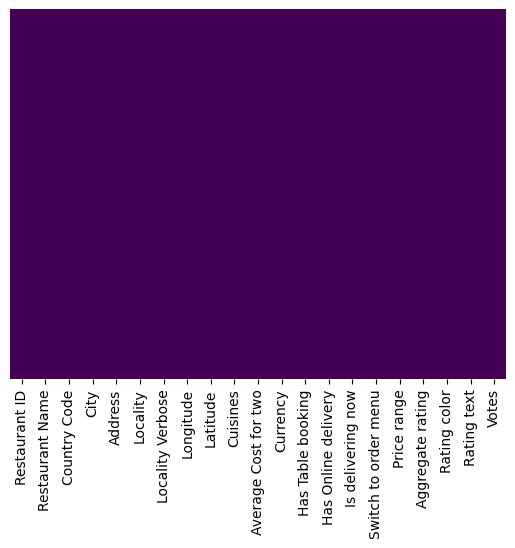

In [ ]:
sns.heatmap(df_zomato.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df_country=pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
df_country.columns

Index(['Country Code', 'Country'], dtype='object')

In [ ]:
final_df = pd.merge(df_zomato, df_country, on='Country Code', how='left')

In [ ]:
final_df

([<matplotlib.patches.Wedge at 0x7b34e62ba3b0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

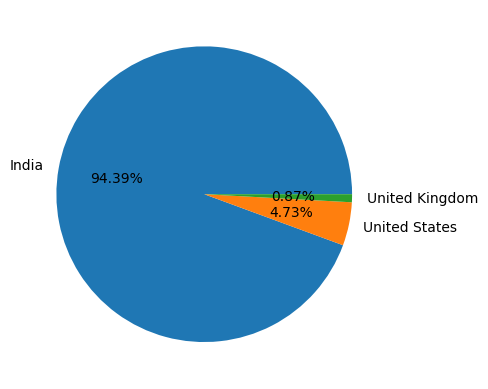

In [ ]:
country_names=final_df.Country.value_counts().index
country_val=final_df.Country.value_counts().values
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')

In [ ]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

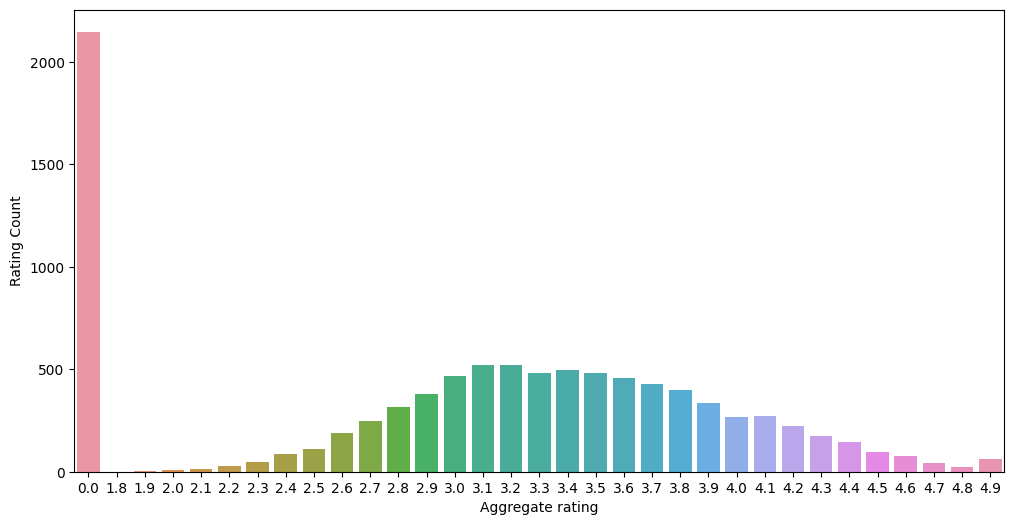

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)